In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# 書き出し用辞書

検討結果書き出し用の辞書ファイル

In [2]:
result = {}

# 発生戸数

In [3]:
n = 10000

# 階数

<img src="figure/storeys.png" width = "50%" height = "50%">

In [4]:
def get_story_prop():
    
    n = np.array([
        [1400, 13800, 300],
        [1400, 13800, 300],
        [1700, 10500, 0],
        [3500, 38600, 900],
        [19800, 283300, 14400],
        [19800, 283300, 14400],
        [4600, 4300, 100],
        [1100, 1100, 100]
    ])
    
    sum_n = n.sum(axis=1).repeat(3).reshape(8,3)
    
    return n/sum_n

In [5]:
story_prop = get_story_prop()
story_prop

array([[0.09032258, 0.89032258, 0.01935484],
       [0.09032258, 0.89032258, 0.01935484],
       [0.13934426, 0.86065574, 0.        ],
       [0.08139535, 0.89767442, 0.02093023],
       [0.0623622 , 0.89228346, 0.04535433],
       [0.0623622 , 0.89228346, 0.04535433],
       [0.51111111, 0.47777778, 0.01111111],
       [0.47826087, 0.47826087, 0.04347826]])

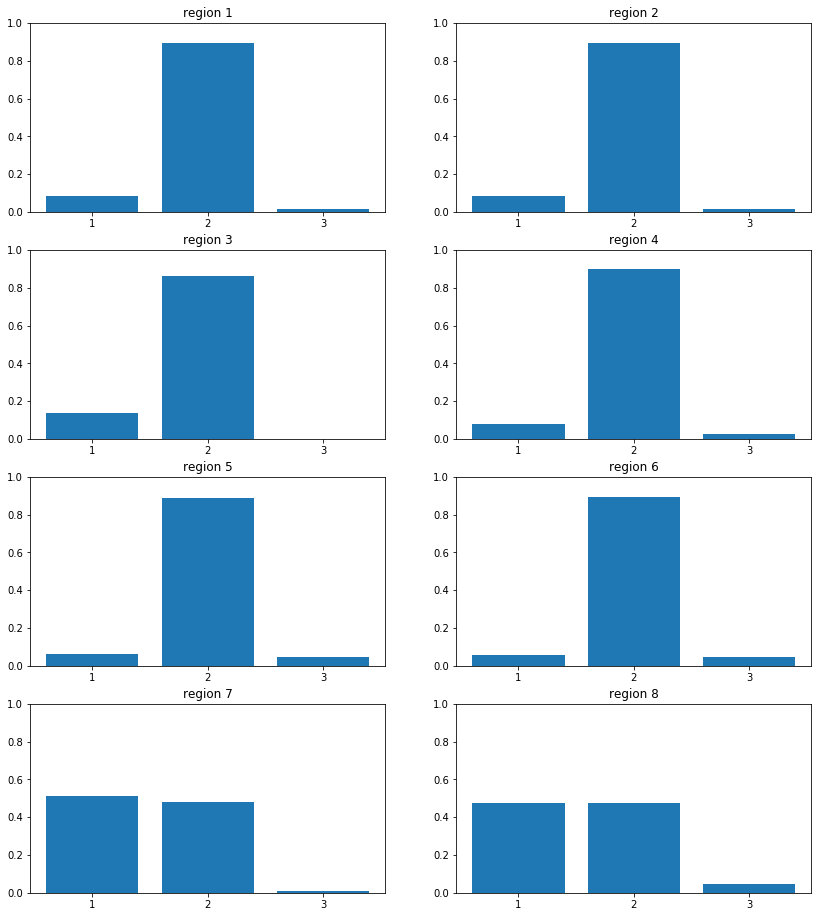

In [6]:
fig = plt.figure(figsize=(14,16))

for r in range(8):
    ax = fig.add_subplot(4,2,r+1)
    story = np.random.choice(a=[1,2,3], size=n, p=story_prop[r])
    c = np.array([np.count_nonzero(story == 1), np.count_nonzero(story == 2), np.count_nonzero(story == 3)])
    ax.bar(x=[1,2,3], height=c/n, tick_label=[1,2,3])
    ax.set_ylim([0,1])
    ax.set_title('region ' + str(r+1))
    

plt.show()

In [7]:
result['story'] = {
    'a': [1,2,3],
    'p': {
        'region_1': list(story_prop[0]),
        'region_2': list(story_prop[1]),
        'region_3': list(story_prop[2]),
        'region_4': list(story_prop[3]),
        'region_5': list(story_prop[4]),
        'region_6': list(story_prop[5]),
        'region_7': list(story_prop[6]),
        'region_8': list(story_prop[7]),
    }
}

# 延床面積

<img src="figure/floor_area.png" width = "30%" height = "30%">

In [8]:
def get_floor_area_hist():
    
    bins = np.array([65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165, 175, 185, 245, 300])
    freq = np.array([12, 18, 29, 50, 65, 82, 74, 56, 32, 24, 16, 13, 10, 22, 2])
    
    return bins, freq

In [9]:
floor_area_bins, floor_area_freq = get_floor_area_hist()

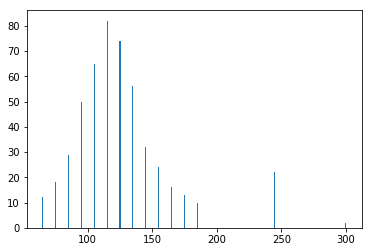

In [10]:
plt.bar(floor_area_bins, floor_area_freq)
plt.show()

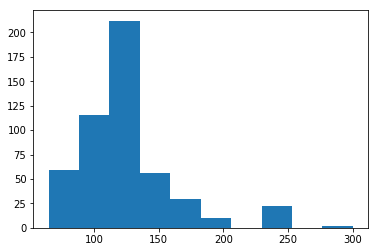

In [11]:
floor_area = np.concatenate([np.tile(b, f) for b, f in zip(floor_area_bins, floor_area_freq)])
plt.hist(floor_area)
plt.show()

In [12]:
floor_area_log_ave = np.average(np.log(floor_area))
floor_area_log_var = np.var(np.log(floor_area))
floor_area_log_std = np.std(np.log(floor_area))
floor_area_stat = np.exp(np.random.normal(floor_area_log_ave, floor_area_log_std, n))

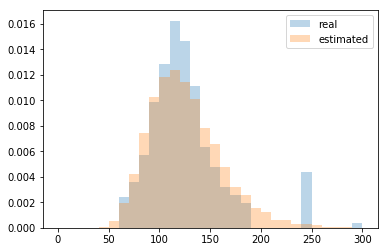

In [13]:
plt.hist(floor_area, range=[0,300], alpha=0.3, density=True, bins=30, label= 'real')
plt.hist(floor_area_stat, range=[0,300], alpha=0.3, density=True, bins=30, label = 'estimated')
plt.legend()
plt.show()

In [14]:
result['floor_area'] = {
    'log_ave': floor_area_log_ave,
    'log_std': floor_area_log_std,
}

# アスペクト比（✕形状係数）

<img src="figure/aspect_ratio.png" width = "30%" height = "30%">

In [15]:
def get_aspect_ratio_hist():
    
    bins = np.array([0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1])
    freq = np.array([24, 110, 144, 87, 62, 41, 12, 8, 7, 3, 1, 6])
    
    return bins, freq

In [16]:
aspect_ratio_bins, aspect_ratio_freq = get_aspect_ratio_hist()

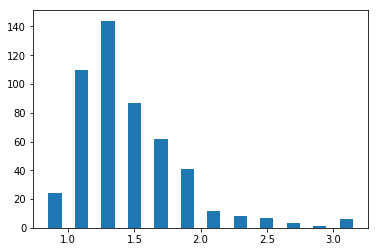

In [17]:
plt.bar(aspect_ratio_bins, aspect_ratio_freq, width=0.1)
plt.show()

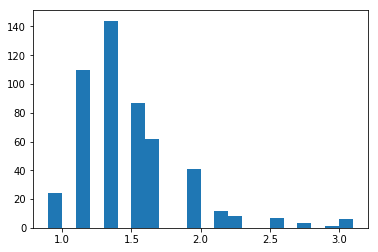

In [18]:
aspect_ratio = np.concatenate([np.tile(b, f) for b, f in zip(aspect_ratio_bins, aspect_ratio_freq)])
plt.hist(aspect_ratio, bins=22)
plt.show()

In [19]:
aspect_ratio_log_ave = np.average(np.log(aspect_ratio))
aspect_ratio_log_std = np.std(np.log(aspect_ratio))
aspect_ratio_stat = np.exp(np.random.normal(aspect_ratio_log_ave, aspect_ratio_log_std, n))

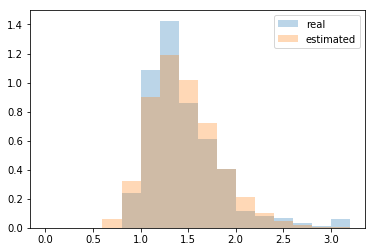

In [20]:
plt.hist(aspect_ratio, range=[0,3.2], alpha=0.3, density=True, bins=16, label= 'real')
plt.hist(aspect_ratio_stat, range=[0,3.2], alpha=0.3, density=True, bins=16, label = 'estimated')
plt.legend()
plt.show()

In [21]:
result['aspect_ratio'] = {
    'log_ave': aspect_ratio_log_ave,
    'log_std': aspect_ratio_log_std,
}

# 主開口方位

<img src="figure/direction_1.png" width = "30%" height = "30%">

<img src="figure/direction_2.png" width = "45%" height = "45%">

In [22]:
direction_hist = np.array([3, 8, 15, 83, 287, 92, 9, 8])

In [23]:
direction_prop = direction_hist / np.sum(direction_hist)
direction_prop

array([0.00594059, 0.01584158, 0.02970297, 0.16435644, 0.56831683,
       0.18217822, 0.01782178, 0.01584158])

In [24]:
result['direction'] = {
    'a': ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'],
    'p': list(direction_prop)
}

In [25]:
direction = np.random.choice(a=['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'], size=n, p=direction_prop)

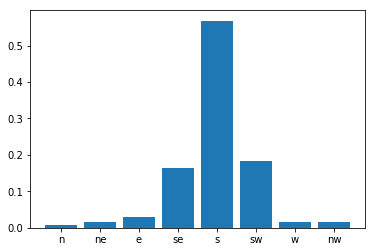

In [26]:
c = np.array([np.count_nonzero(direction == d) for d in ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw']])
plt.bar(x=['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'], height=c/n, tick_label=['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'])
plt.show()

# 開口部面積比率

<img src="figure/opening_ratio_1.png" width = "40%" height = "40%">

<img src="figure/opening_ratio_2.png" width = "60%" height = "30%">

In [27]:
opening_ratio_bins = np.array([4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5])
opening_ratio_freq = np.array([5, 17, 45, 74, 119, 80, 75, 42, 24, 8, 8, 5, 0, 3])

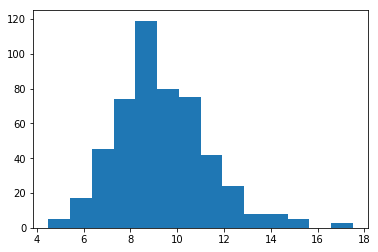

In [28]:
opening_ratio = np.concatenate([np.tile(b, f) for b, f in zip(opening_ratio_bins, opening_ratio_freq)])
plt.hist(opening_ratio, bins=14)
plt.show()

In [29]:
opening_ratio_log_ave = np.average(np.log(opening_ratio))
opening_ratio_log_std = np.std(np.log(opening_ratio))
opening_ratio_stat = np.exp(np.random.normal(opening_ratio_log_ave, opening_ratio_log_std, n))

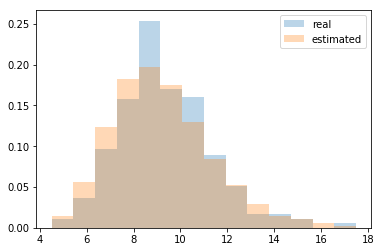

In [30]:
plt.hist(opening_ratio, range=[4.5,17.5], alpha=0.3, density=True, bins=14, label= 'real')
plt.hist(opening_ratio_stat, range=[4.5,17.5], alpha=0.3, density=True, bins=14, label = 'estimated')
plt.legend()
plt.show()

In [31]:
result['opening_ratio'] = {
    'log_ave': opening_ratio_log_ave,
    'log_std': opening_ratio_log_std,
}

# 各特性の書き出し

In [34]:
result

{'story': {'a': [1, 2, 3],
  'p': {'region_1': [0.09032258064516129,
    0.8903225806451613,
    0.01935483870967742],
   'region_2': [0.09032258064516129, 0.8903225806451613, 0.01935483870967742],
   'region_3': [0.13934426229508196, 0.860655737704918, 0.0],
   'region_4': [0.08139534883720931, 0.8976744186046511, 0.020930232558139535],
   'region_5': [0.06236220472440945, 0.8922834645669291, 0.04535433070866142],
   'region_6': [0.06236220472440945, 0.8922834645669291, 0.04535433070866142],
   'region_7': [0.5111111111111111, 0.4777777777777778, 0.011111111111111112],
   'region_8': [0.4782608695652174,
    0.4782608695652174,
    0.043478260869565216]}},
 'floor_area': {'log_ave': 4.795434569066554, 'log_std': 0.27356281805671834},
 'aspect_ratio': {'log_ave': 0.34265303318546936,
  'log_std': 0.24512178873989865},
 'direction': {'a': ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'],
  'p': [0.005940594059405941,
   0.015841584158415842,
   0.0297029702970297,
   0.16435643564356436,
  

In [33]:
fw = open('house_spec.json', 'w')
json.dump(result, fw, indent=4)